In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('processed_clean_data.csv')
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13


In [4]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification

from scipy.special import softmax

In [5]:
roberta ='cardiffnlp/twitter-roberta-base-sentiment'

In [6]:
model = AutoModelForSequenceClassification.from_pretrained(roberta)

In [7]:
tokenizer = AutoTokenizer.from_pretrained(roberta)

In [8]:
labels=['Negative','Neutral','Positive']


In [9]:
df.columns

Index(['name', 'rating', 'title', 'reviews', 'title_reveiws', 'clean_text',
       'Length_of_title_review', 'Length_of_clean_text'],
      dtype='object')

In [10]:
clean_text=df['clean_text'].tolist()

In [11]:

#Sentiment  Analysis

encode_review = tokenizer(clean_text,return_tensors='pt',padding=True)

In [12]:
encode_review

{'input_ids': tensor([[    0, 15110,  1571,  ...,     1,     1,     1],
        [    0,  3463, 45548,  ...,     1,     1,     1],
        [    0, 34033,     2,  ...,     1,     1,     1],
        ...,
        [    0, 16101,   428,  ...,     1,     1,     1],
        [    0,  1843,  8667,  ...,     1,     1,     1],
        [    0,  9119,  7357,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [13]:
output = model(encode_review['input_ids'],encode_review['attention_mask'])
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.6079,  0.6742, -2.2743],
        [-2.7453,  0.2718,  2.9274],
        [-1.2480,  0.5214,  1.2486],
        [-1.4920,  0.4493,  1.4222],
        [-2.0127,  0.4353,  2.1221],
        [ 1.0990,  0.8191, -1.9889],
        [-1.2410,  0.3416,  1.2053],
        [-1.9452,  0.2999,  2.0194],
        [-1.2349,  0.7594,  0.6102],
        [ 1.9226,  0.3420, -2.3533],
        [ 2.4083,  0.2255, -2.8107],
        [-1.9508,  0.0918,  2.3299],
        [-0.3975,  1.2347, -0.9348],
        [-2.7167,  0.2894,  2.7203],
        [-2.1016,  0.3193,  2.0406],
        [-2.0185,  0.1825,  2.3501],
        [-2.7228,  0.5227,  2.4553],
        [-2.7511, -0.1227,  3.4099],
        [-2.1230,  0.2082,  2.3447],
        [ 1.3707,  0.3575, -1.7309],
        [-2.3202,  0.0068,  3.1189],
        [-2.3032,  0.1462,  2.6891],
        [-2.3934, -0.0700,  3.0359],
        [-1.7723,  0.3414,  1.7742],
        [-2.2714,  0.1977,  2.3897],
        [-1.1610,  1.0385, -0.11

In [14]:
output[0]

tensor([[ 1.6079,  0.6742, -2.2743],
        [-2.7453,  0.2718,  2.9274],
        [-1.2480,  0.5214,  1.2486],
        [-1.4920,  0.4493,  1.4222],
        [-2.0127,  0.4353,  2.1221],
        [ 1.0990,  0.8191, -1.9889],
        [-1.2410,  0.3416,  1.2053],
        [-1.9452,  0.2999,  2.0194],
        [-1.2349,  0.7594,  0.6102],
        [ 1.9226,  0.3420, -2.3533],
        [ 2.4083,  0.2255, -2.8107],
        [-1.9508,  0.0918,  2.3299],
        [-0.3975,  1.2347, -0.9348],
        [-2.7167,  0.2894,  2.7203],
        [-2.1016,  0.3193,  2.0406],
        [-2.0185,  0.1825,  2.3501],
        [-2.7228,  0.5227,  2.4553],
        [-2.7511, -0.1227,  3.4099],
        [-2.1230,  0.2082,  2.3447],
        [ 1.3707,  0.3575, -1.7309],
        [-2.3202,  0.0068,  3.1189],
        [-2.3032,  0.1462,  2.6891],
        [-2.3934, -0.0700,  3.0359],
        [-1.7723,  0.3414,  1.7742],
        [-2.2714,  0.1977,  2.3897],
        [-1.1610,  1.0385, -0.1185],
        [-1.9459,  0.7744,  1.1520],
 

In [15]:
scores=[]
for i in range(len(output[0])):
    scores.append(output[0][i].detach().numpy())
    
scores


[array([ 1.6079364 ,  0.67422616, -2.2742887 ], dtype=float32),
 array([-2.7453432 ,  0.27180707,  2.9274168 ], dtype=float32),
 array([-1.2479808,  0.5213852,  1.248579 ], dtype=float32),
 array([-1.491988 ,  0.4492513,  1.4221654], dtype=float32),
 array([-2.0126505 ,  0.43527475,  2.1220753 ], dtype=float32),
 array([ 1.0989964,  0.8190594, -1.9889222], dtype=float32),
 array([-1.2410038,  0.3416276,  1.2052717], dtype=float32),
 array([-1.9452356 ,  0.29986873,  2.019392  ], dtype=float32),
 array([-1.234858  ,  0.7593953 ,  0.61015105], dtype=float32),
 array([ 1.9226227 ,  0.34198582, -2.3532577 ], dtype=float32),
 array([ 2.4082508 ,  0.22545168, -2.810704  ], dtype=float32),
 array([-1.9508173 ,  0.09177911,  2.3298657 ], dtype=float32),
 array([-0.3974524,  1.2347407, -0.9348483], dtype=float32),
 array([-2.7166953,  0.2894456,  2.7203145], dtype=float32),
 array([-2.1016345 ,  0.31929168,  2.040587  ], dtype=float32),
 array([-2.018489  ,  0.18245968,  2.3501396 ], dtype=floa

In [16]:
scores[0][0]

1.6079364

In [17]:
scores[0]

array([ 1.6079364 ,  0.67422616, -2.2742887 ], dtype=float32)

In [18]:
scores_scaler=[]
for i in range(len(scores)):
    x=softmax(scores[i])
    scores_scaler.append(x)

In [19]:
scores_scaler[0][0]

0.7073649

In [20]:
dict_list={}
for j in range(len(scores_scaler)):
    for i in range(len(labels)):
        l = labels[i]
        s = scores_scaler[0][i]
        print(l,s)
        
    print('**'*25)


Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649
Neutral 0.2780599
Positive 0.014575203
**************************************************
Negative 0.7073649


In [21]:
negative=[]
neutral=[]
positive=[]
for i in range(len(scores_scaler)):
    negative.append(scores_scaler[i][0])
    neutral.append(scores_scaler[i][1])
    positive.append(scores_scaler[i][2])


In [22]:
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df.head()

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,negative,neutral,positive
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.707365,0.278060,0.014575
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.003202,0.065434,0.931364
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.052610,0.308670,0.638720
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.037878,0.263910,0.698212
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.013327,0.154115,0.832558


In [23]:
df.columns

Index(['name', 'rating', 'title', 'reviews', 'title_reveiws', 'clean_text',
       'Length_of_title_review', 'Length_of_clean_text', 'negative', 'neutral',
       'positive'],
      dtype='object')

In [24]:
max_cols = df[['negative','neutral','positive']].idxmax(axis=1)

In [25]:
df['Sentiment_having_max_score'] = max_cols

In [26]:
df

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,negative,neutral,positive,Sentiment_having_max_score
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.707365,0.278060,0.014575,negative
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.003202,0.065434,0.931364,positive
2,sandeep rawat,5.0,Nice,Nice,Nice Nice,nice,9,4,0.052610,0.308670,0.638720,positive
3,Ashutosh Kumar,4.0,Good.,It is good for my gum,Good. It is good for my gum,good gum,27,8,0.037878,0.263910,0.698212,positive
4,P.VEERA NARENDRA,5.0,Superb,Good taste,Superb Good taste,superb good taste,17,17,0.013327,0.154115,0.832558,positive
5,Anita Kochhar,4.0,Gentle on gums,Have sensitive gums and found other toothpast...,Gentle on gums Have sensitive gums and found ...,gentle gum sensitive gum found toothpaste irri...,95,58,0.555115,0.419573,0.025311,negative
6,G.l.babu,5.0,Good,Very good,Good Very good,good,14,4,0.057428,0.279547,0.663025,positive
7,Deokant singh,4.0,Good,Like,Good Like,good like,9,9,0.015837,0.149526,0.834636,positive
8,Savita sharma,4.0,Normal toothpaste,Just taste like termaric nothing special and d...,Normal toothpaste Just taste like termaric not...,normal toothpaste taste like termaric nothing ...,152,128,0.068144,0.500632,0.431224,neutral
9,SivaRam,3.0,OK,Not so effective...,OK Not so effective...,not effective,22,13,0.819844,0.168760,0.011396,negative


In [29]:
df.to_csv('SENTIMENT_ANALYSIS_USING_twitter-roberta-base-sentiment_on_clean_text.csv',index=False)

In [30]:
df.iloc[:,-1:].value_counts()

Sentiment_having_max_score
positive                      33
negative                       7
neutral                        3
dtype: int64

In [31]:
df2=pd.read_csv('SENTIMENT_ANALYSIS_USING_twitter-roberta-base-sentiment_on_raw_text.csv')
df2.head(2)

,name,rating,title,reviews,title_reveiws,clean_text,Length_of_title_review,Length_of_clean_text,negative,neutral,positive,Sentiment_having_max_score
0,C K,3.0,Publicity tactic.,Nothing new. Only to make customers fool.,Publicity tactic. Nothing new. Only to make cu...,publicity tactic nothing new make customer fool,59,47,0.680191,0.297181,0.022629,negative
1,Josie Lyngdoh,4.0,Its exactly shown,Really happy with it,Its exactly shown Really happy with it,exactly shown really happy,38,26,0.004157,0.068579,0.927264,positive


#### Comparision of Raw Data and Processed Data  

positive    33
negative     7
neutral      3
Name: Sentiment_having_max_score, dtype: int64


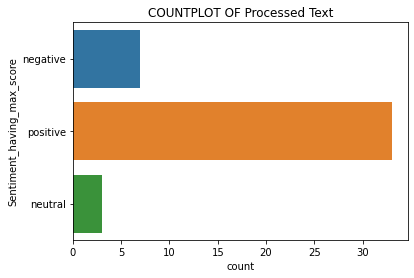

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('COUNTPLOT OF Processed Text')
sns.countplot(data=df,y='Sentiment_having_max_score')
print(df['Sentiment_having_max_score'].value_counts())

positive    37
negative     5
neutral      1
Name: Sentiment_having_max_score, dtype: int64


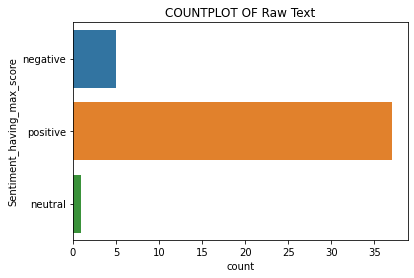

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('COUNTPLOT OF Raw Text')
sns.countplot(data=df2,y='Sentiment_having_max_score')
print(df2['Sentiment_having_max_score'].value_counts())